In [14]:
## Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv('aerofit_treadmill_data.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [16]:
df.describe()
"""AGE: Average is 29, Minimum is 18, and Maximum is 50
Education: Average is 15.5 years, Minimum is 12 years, Maximum is 21 years
Usage: Average is 3.5, Minimum is 2, Maximum is 5
Fitness: Average is 3.3, Minimum is 1, Maximum is 5
Income: Average is 53719.5, Minimum is 29562, Maximum is 104581
Miles Walked: Average is 103, Minimum is 21, Maximum 360"""


'AGE: Average is 29, Minimum is 18, and Maximum is 50\nEducation: Average is 15.5 years, Minimum is 12 years, Maximum is 21 years\nUsage: Average is 3.5, Minimum is 2, Maximum is 5\nFitness: Average is 3.3, Minimum is 1, Maximum is 5\nIncome: Average is 53719.5, Minimum is 29562, Maximum is 104581\nMiles Walked: Average is 103, Minimum is 21, Maximum 360'

In [17]:
df.isna().sum()
# No missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [23]:
df_new = df.drop(columns=['MaritalStatus', 'Gender', 'Product'])

'Age is not correlated to Usage so it should not be regarded when purchasing treadmills.\nMiles and Fitness and Miles and Usage are highly correlated meaning that if their fitness level is high then they use the treadmill more'

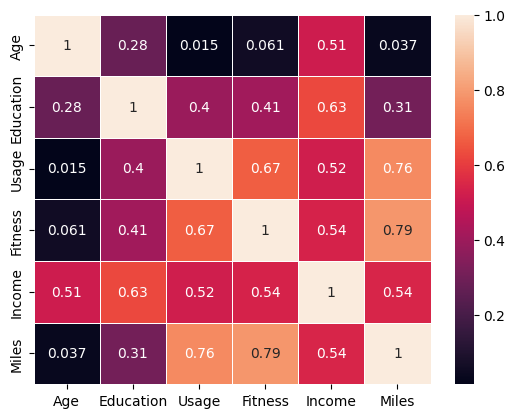

In [24]:
sns.heatmap(data=df_new.corr(), annot=True, linewidths=0.5)
"""Age is not correlated to Usage so it should not be regarded when purchasing treadmills.
Miles and Fitness and Miles and Usage are highly correlated meaning that if their fitness level is high then they use the treadmill more"""

